<a href="https://colab.research.google.com/github/Mariyselita/CIP/blob/main/Tarea_3_Escalamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo
filepath = '/content/drive/My Drive/CIP_CB/cyberbullying_tweets.csv'

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(filepath)

Mounted at /content/drive


In [2]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transformar textos a TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(df['tweet_text'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [4]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X_tfidf_df)
X_standard_scaled_df = pd.DataFrame(X_standard_scaled, columns=tfidf_vectorizer.get_feature_names_out())


In [5]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X_tfidf_df)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=tfidf_vectorizer.get_feature_names_out())


In [6]:
from sklearn.preprocessing import RobustScaler

# RobustScaler
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_tfidf_df)
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=tfidf_vectorizer.get_feature_names_out())


In [7]:
from sklearn.preprocessing import QuantileTransformer

# QuantileTransformer
quantile_transformer = QuantileTransformer()
X_quantile_transformed = quantile_transformer.fit_transform(X_tfidf_df)
X_quantile_transformed_df = pd.DataFrame(X_quantile_transformed, columns=tfidf_vectorizer.get_feature_names_out())


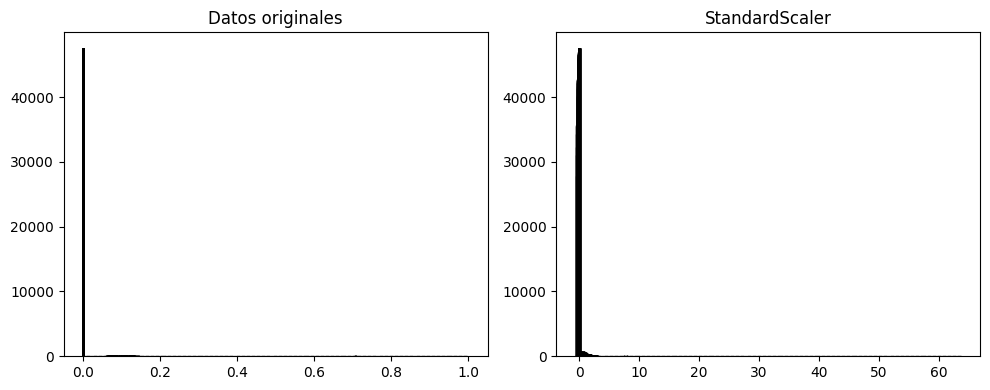

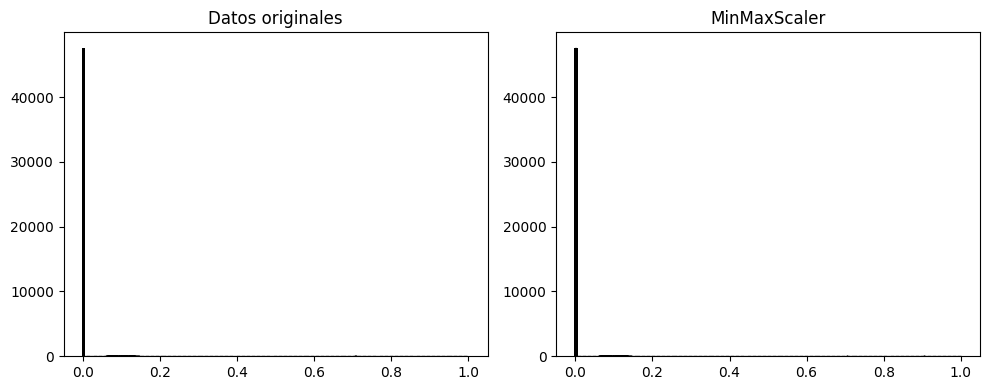

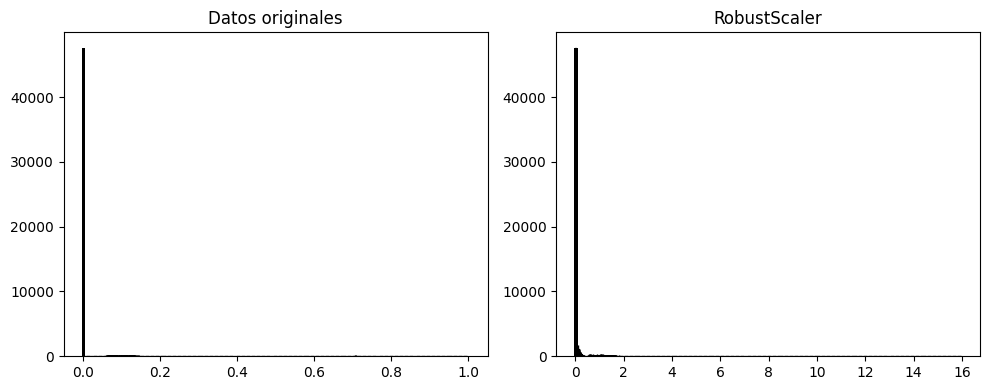

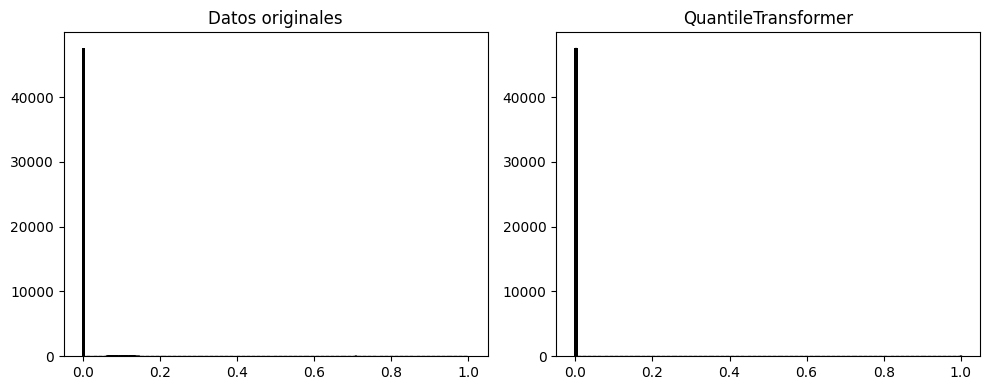

In [8]:
import matplotlib.pyplot as plt

# Función para crear gráficos de comparación
def plot_comparison(original, scaled, title):

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(original, bins=1000, edgecolor='k')
    plt.title('Datos originales')
    plt.subplot(1, 2, 2)
    plt.hist(scaled, bins=1000, edgecolor='k')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_comparison(X_tfidf_df, X_standard_scaled, 'StandardScaler', )
plot_comparison(X_tfidf_df, X_minmax_scaled, 'MinMaxScaler')
plot_comparison(X_tfidf_df, X_robust_scaled, 'RobustScaler')
plot_comparison(X_tfidf_df, X_quantile_transformed, 'QuantileTransformer')

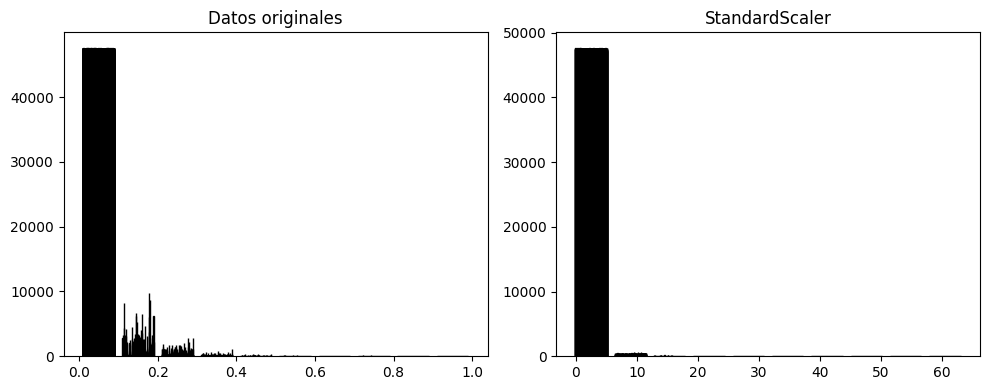

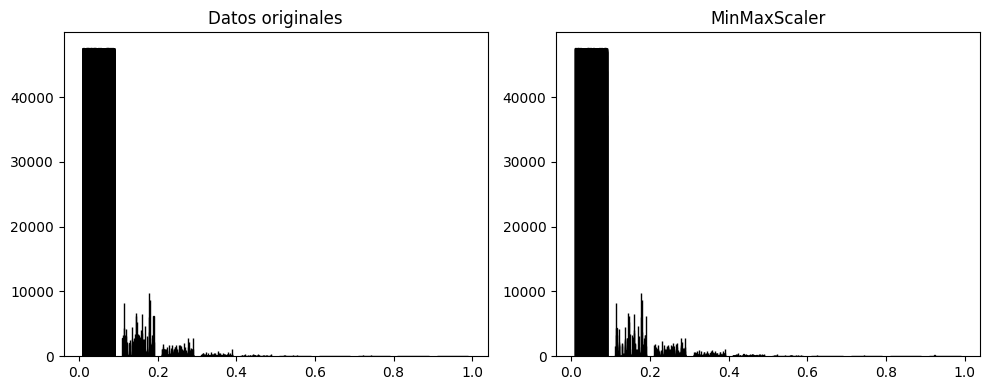

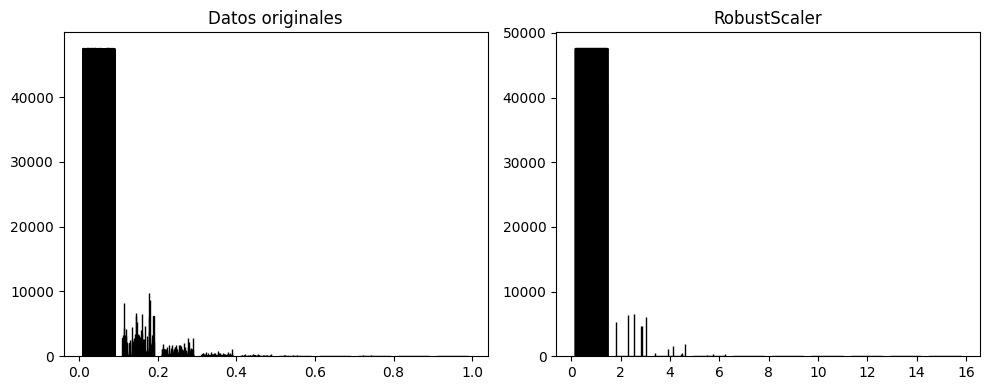

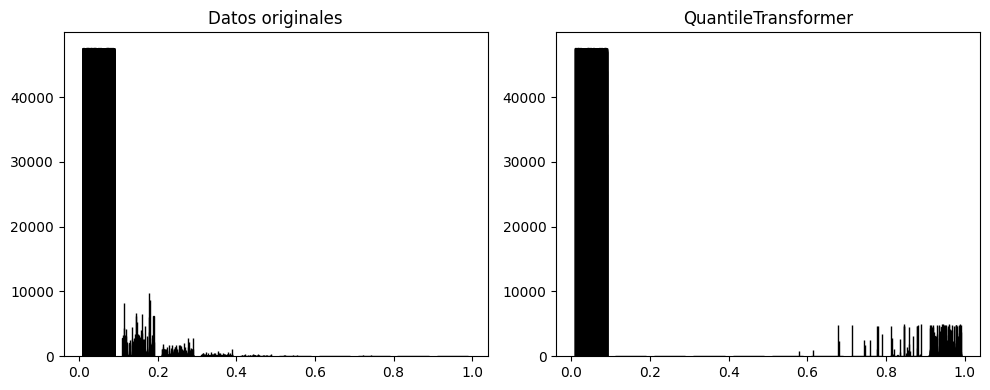

In [9]:
import matplotlib.pyplot as plt

# Función para crear gráficos de comparación
def plot_comparison(original, scaled, title):

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(original, bins=10, edgecolor='k')
    plt.title('Datos originales')
    plt.subplot(1, 2, 2)
    plt.hist(scaled, bins=10, edgecolor='k')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_comparison(X_tfidf_df, X_standard_scaled, 'StandardScaler', )
plot_comparison(X_tfidf_df, X_minmax_scaled, 'MinMaxScaler')
plot_comparison(X_tfidf_df, X_robust_scaled, 'RobustScaler')
plot_comparison(X_tfidf_df, X_quantile_transformed, 'QuantileTransformer')